# LinkedIn Network Study

In [56]:
pip install imgkit

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

In [44]:
df_ori = pd.read_csv("Connections.csv", skiprows=2)

In [45]:
df_ori

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Juan Antonio,Morales Jiménez,NaN,BBVA AI Factory,Data Scientist,09 May 2022
1,Javier,Pardo Mateus,NaN,Trust Gestión Estratégica de Riesgos,Monitor y analista de información,09 May 2022
2,Jacobo,Fernández Miranda,NaN,The Cocktail,Digital Analytics Consultant,09 May 2022
3,Ana,Gonzalez-Outon Gamero,NaN,Accenture España,Data scientist,09 May 2022
4,Maria,Gago,NaN,INDITEX TEMPE,HR Tempe,09 May 2022
...,...,...,...,...,...,...
416,Juan José,Navarro Tarín,NaN,ABAST,Consultor funcional Oracle R12,29 Apr 2021
417,Mario,Martínez Gonzálvez,NaN,Grupo Alsanbo,Tecnico en programación,29 Apr 2021
418,Alejandro,Polo Aznar,NaN,SPB | THE SPB GLOBAL CORPORATION,Project Manager,19 Feb 2021
419,Marina,Frías Reig,NaN,HISPANITAS - JOY IS A CHOICE,Brand Marketing Manager,27 Jan 2021


In [46]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     419 non-null    object
 1   Last Name      419 non-null    object
 2   Email Address  12 non-null     object
 3   Company        413 non-null    object
 4   Position       414 non-null    object
 5   Connected On   421 non-null    object
dtypes: object(6)
memory usage: 19.9+ KB


In [47]:
df = (
    df_ori
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%d %b %Y')
  )
df.head()

,company,position,connected_on
0,BBVA AI Factory,Data Scientist,2022-05-09
1,Trust Gestión Estratégica de Riesgos,Monitor y analista de información,2022-05-09
2,The Cocktail,Digital Analytics Consultant,2022-05-09
3,Accenture España,Data scientist,2022-05-09
4,INDITEX TEMPE,HR Tempe,2022-05-09


### Top 10 companies

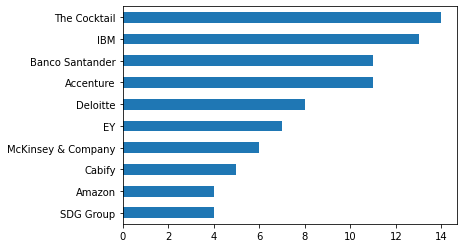

In [48]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

In [49]:
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(10)

,company,count
0,The Cocktail,14
1,IBM,13
2,Banco Santander,11
3,Accenture,11
4,Deloitte,8
5,EY,7
6,McKinsey & Company,6
7,Cabify,5
11,Capgemini,4
12,Merkle España,4


In [50]:
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(10)

,position,count
0,Data Scientist,81
1,Data Analyst,44
2,Senior Data Scientist,20
3,Data scientist,9
4,Data Engineer,5
5,Data-analyst,4
6,Senior Data Analyst,4
7,Product Data Analyst,4
8,Data Scientist,4
13,Full-stack Developer,3


In [51]:
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)

(290, 2)
(8, 2)


In [52]:
print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=5]
print(df_position_reduced.shape)

(225, 2)
(5, 2)


In [53]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_company_reduced.iterrows():

  # store company name and count
  company = row['company']
  count = row['count']

  title = f"<b>{company}</b> – {count}"
  positions = set([x for x in df[company == df['company']]['position']])
  positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  position_list = f"<ul>{positions}</ul>"
  hover_info = title + position_list

  g.add_node(company, size=count*2, title=hover_info, color='#3449eb')
  g.add_edge('root', company, color='grey')

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="white", font_color='black')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('company_graph.html')
display(HTML('company_graph.html'))

In [54]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_position_reduced.iterrows():

  count = f"{row['count']}"
  position= row['position']
  
  g.add_node(position, size=count, color='#3449eb', title=count)
  g.add_edge('root', position, color='grey')

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="white", font_color='black')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('position_graph.html')
display(HTML('position_graph.html'))